In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
def train_data_pre(data):
    data.drop(['PassengerId','Name' ,'Cabin'], axis=1, inplace=True)
    data['Embarked'] = data['Embarked'].fillna('S')
    data['Age'] = data['Age'].fillna(29.758889)
    encoder = OrdinalEncoder()
    data['Ticket'] = encoder.fit_transform(data[['Ticket']])
    data = pd.get_dummies(data)
    return data
tr_data = train_data_pre(train_data)
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
def test_data_pre(data):
    data.drop(['PassengerId', 'Name','Cabin'], axis=1, inplace=True)
    data['Fare'] = data['Fare'].fillna(32.204208)
    data['Age'] = data['Age'].fillna(29.758889)
    encoder = OrdinalEncoder()
    data['Ticket'] = encoder.fit_transform(data[['Ticket']])
    data = pd.get_dummies(data)
    return data
te_data = test_data_pre(test_data)
sample = pd.read_csv("gender_submission.csv")
te_data['Survived'] = sample['Survived']
data = pd.concat([tr_data, te_data], axis=0)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,523.0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,596.0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,669.0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,49.0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,472.0,8.0500,0,1,0,0,1


In [4]:
x = data.drop("Survived", axis=1)
y = data[['Survived']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [5]:
yhat = model.predict(x_test)
acc = accuracy_score(y_test, yhat)
acc
te_data.drop('Survived', axis=1, inplace=True)
predictions = model.predict(te_data)

sample['Survived'] = predictions

sample.to_csv('Submission_csv', index=False)


In [6]:
x = data.drop("Survived", axis=1)
y = data[['Survived']]


train_accuracy = []
test_accuracy = []
for i in range(1, 8):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    x_mapped = poly.fit_transform(x)

    scaler = StandardScaler()
    x_mapped_scaled = scaler.fit_transform(x_mapped)

    x_train, x_test, y_train, y_test = train_test_split(x_mapped_scaled, y, test_size=0.2, random_state=42)

    model = LogisticRegression()
    model.fit(x_train, y_train)

    train_yhat = model.predict(x_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_accuracy.append(train_acc)

    test_yhat = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_accuracy.append(test_acc)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


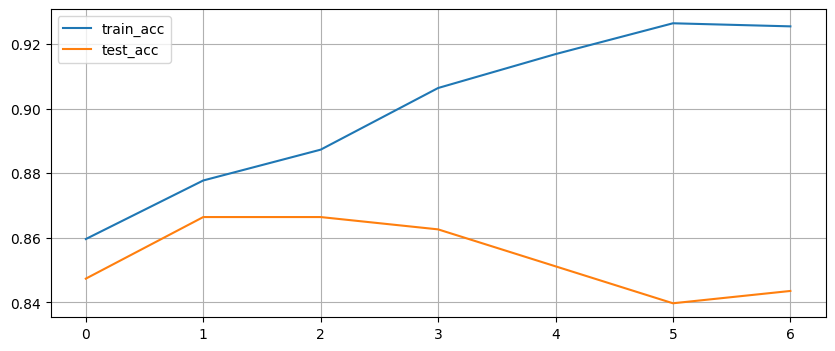

In [7]:
plt.figure(figsize=(10,4))
plt.plot(train_accuracy)
plt.plot(test_accuracy)
#plt.xticks(ticks = len(range(1, 8)), label=range(1, 8))
plt.legend(['train_acc', 'test_acc'])
plt.grid()
plt.show()


In [8]:
x = data.drop("Survived", axis=1)
y = data[['Survived']]

poly = PolynomialFeatures(degree=4, include_bias=False)
x_mapped = poly.fit_transform(x)

scaler = StandardScaler()
x_mapped_scaled = scaler.fit_transform(x_mapped)

x_train, x_test, y_train, y_test = train_test_split(x_mapped_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
yhat = model.predict(x_test)
acc = accuracy_score(y_test, yhat)
acc


0.8625954198473282